In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

Using flux=620 for SNR=5 (see cell #4 of notebook '30. 4a. other psf models-real PSFs')

In [6]:
testObj = dit.DiffimTest(varFlux2=np.repeat(620., 50), sourceFluxRange=(600, 120000))

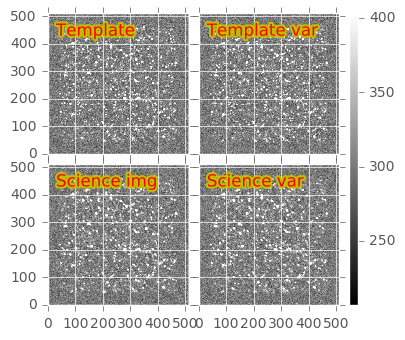

In [7]:
testObj.doPlot();

In [8]:
actualPsf1 = testObj.im2.psf.copy()
im2 = testObj.im2.asAfwExposure()
res2 = dit.tasks.doMeasurePsf(im2, detectThresh=5.0, measurePsfAlg='psfex', spatialOrder=1)

N SOURCES: 427


In [21]:
res2.cellSet

In [22]:
bbox = im2.getBBox()
xcen = (bbox.getBeginX() + bbox.getEndX()) / 2.
ycen = (bbox.getBeginY() + bbox.getEndY()) / 2.
bbox, xcen, ycen

(Box2I(Point2I(0, 0), Extent2I(512, 512)), 256.0, 256.0)

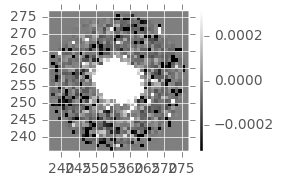

In [23]:
import lsst.afw.geom as afwGeom
img = res2.psf.computeImage(afwGeom.Point2D(xcen, ycen))
dit.plotImageGrid((img,))

In [24]:
psf = res2.psf

In [25]:
actualPsf1 = testObj.im2.psf.copy()
im2 = testObj.im2.asAfwExposure()
res2 = dit.tasks.doMeasurePsf(im2, detectThresh=20.0, measurePsfAlg='pca', spatialOrder=0)
len(res2.cellSet.getCellList())

N SOURCES: 138


16

In [26]:
img = res2.psf.computeImage(afwGeom.Point2D(xcen, ycen))

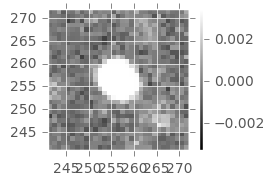

In [27]:
dit.plotImageGrid((img,))

In [2]:
n_runs = 1
testResults1 = dit.multi.runMultiDiffimTests(varSourceFlux=620., n_runs=n_runs, 
                                             remeasurePsfs=[False, True])

RUNNING: 1
CORES: 3
N SOURCES: 304


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:   10.4s finished


In [3]:
tr = testResults1[0]

In [5]:
tr['psfInfo']

{'inputPsf1': None,
 'inputPsf2': None,
 'inputShape1': None,
 'inputShape2': [1.989961637274519,
  4.039946238041112,
  4.039946238041112,
  -0.799989278877403],
 'moments1': None,
 'moments2': (-0.038734646182611181, 0.05960552929997838),
 'nSources': 500,
 'normedRms1': None,
 'normedRms2': 0.014423025051579261,
 'psf1': None,
 'psf2': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 'rms1': None,
 'rms2': 0.00036195844632654815,
 'seed': 66,
 'shape1': None,
 'shape2': [1.984466684425282,
  4.018305440113859,
  4.001850369382684,
  -0.7562819051584514]}

In [ ]:
tr.